In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
import h5py
import matplotlib.pyplot as plt
import cv2
import PIL, PIL.Image
import io
import time
# from GailNavigationNetwork.model import Encoder


# The bytes file version

In [ ]:
def im2bytes(arrs, format='pmg'):
    if len(arrs.shape) == 4:
        return np.array([im2bytes(arr_i, format=format) for arr_i in arrs])
    elif len(arrs.shape) == 3:
        im = PIL.Image.fromarray(arrs.astype(np.uint8))
        with io.BytesIO() as output:
            im.save(output, format="png")
            return output.getvalue()
    else:
        raise ValueError

def bytes2im(arrs):
    if len(arrs.shape) == 1:
        return np.array([bytes2im(arr_i) for arr_i in arrs])
    elif len(arrs.shape) == 0:
        return np.array(PIL.Image.open(io.BytesIO(arrs)))
    else:
        raise ValueError


def img_resize(img,scale=0.5):
    '''
    Resize the image to the given scale
    '''
    
    return cv2.resize(img, (int(img.shape[1]*scale), int(img.shape[0]*scale)), interpolation=cv2.INTER_AREA)


def image_to_bytes(image_array):
    """
    Converts a NumPy array image to bytes.

    Parameters:
    - image_array: NumPy array representing an image.

    Returns:
    - bytes_data: Bytes representation of the image.
    """
    _, encoded_image = cv2.imencode(".jpg", image_array)
    bytes_data = encoded_image.tobytes()
    return bytes_data

def bytes_to_image(bytes_data):
    """
    Converts bytes to a NumPy array image.

    Parameters:
    - bytes_data: Bytes representation of an image.

    Returns:
    - image_array: NumPy array representing the image.
    """
    nparr = np.frombuffer(bytes_data, np.uint8)
    image_array = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return image_array


# The current working version 

In [ ]:
import glob
image_paths = glob.glob('/home/malika/Pictures/*.png')
hdf5_file = h5py.File("./malika.hdf5", "a")
# del hdf5_file["images"]  # Delete existing dataset to overwrite
images= hdf5_file.create_group("images")
# del hdf5_file["kris_dynamics"]  # Delete existing dataset to overwrite

kris_dynamics= hdf5_file.create_group("kris_dynamics")

rgb_dataset = images.create_dataset("rgb_data", (1,120,160,3), maxshape=(None,120,160,3), dtype=np.uint8)
for image_path in image_paths:
    mat=cv2.imread(image_path)
    mat=cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
    image_resized=img_resize(mat,0.5)

    rgb_dataset.resize(rgb_dataset.shape[0] + 1, axis=0)
    rgb_dataset[-1] = image_resized
    
    

In [ ]:
read_file= h5py.File("./malika.hdf5", "r")
for img in read_file['images']['rgb_data']:

    print(img.shape)
    plt.imshow(img)


In [ ]:
file_path="/home/malika/Documents/workspace/Bonn_Stuff/master_thesis/code/ros2_ws/src/gail_navigation/GailNavigationNetwork/data/output_data.hdf5"
read_file= h5py.File(file_path, "r")
for img in read_file['images']['rgb_data']:

    print(img.shape)
    plt.imshow(img)

In [ ]:
# Testting the odom method 

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import h5py

test_file = h5py.File("./test.hdf5", "a")
ass=[1,2,3,4]
bss=[5,6,7,8]
kris_dynamics= test_file.create_dataset("kris_dynamics",shape=(1,),maxshape=(None,))
for a in ass:
    kris_dynamics.resize(kris_dynamics.shape[0] + 1, axis=0)
    kris_dynamics[-1] = a


In [ ]:
read_file= h5py.File("./test.hdf5", "a")
for img in read_file['kris_dynamics']:
    print(img)



# Editing the odom and goal pose 

In [ ]:
import numpy as np
ass=np.array([1,2,3,4])
bss=np.array([5,6,7,8])
a=np.vstack((ass,bss))
print(a)


In [ ]:
a=np.vstack((a,a[-1,:]))
print(a)
a=np.delete(a,0,axis=0)
print(a)

In [ ]:
goal=np.random.rand(1,6)
print(f"goal before {goal} and \n shape {goal.shape} \n\n")
goal=np.repeat(goal,2,axis=0)
print(f"goal after{goal} and \n shape {goal.shape} \n ")
odom=np.random.rand(2,6)
targer=goal-odom
print(targer)

In [3]:
file_path="/home/malika/Documents/workspace/Bonn_Stuff/master_thesis/code/ros2_ws/src/gail_navigation/GailNavigationNetwork/data/traj1.hdf5"
read_file= h5py.File(file_path, "r")
print(read_file['images'].keys())

<KeysViewHDF5 ['depth_data', 'rgb_data']>


(240, 320)


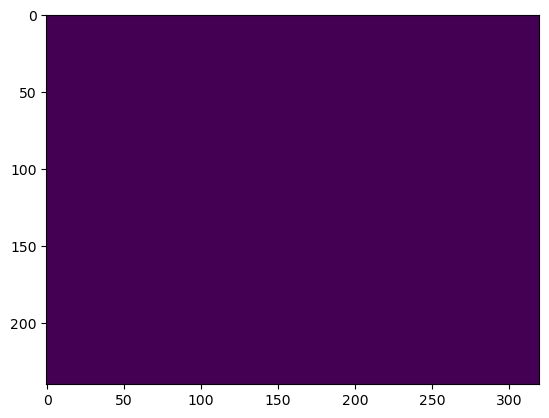

(240, 320)


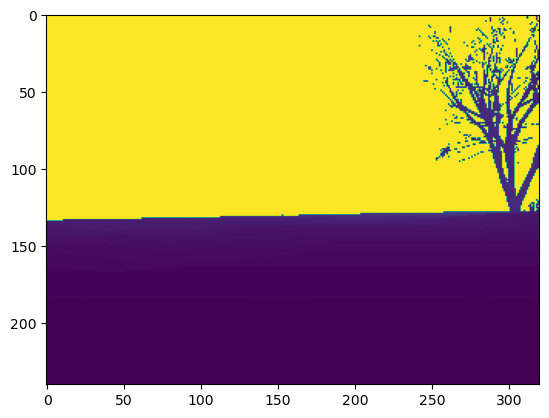

(240, 320)


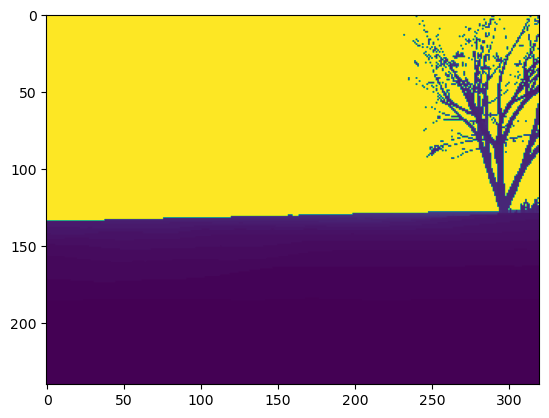

(240, 320)


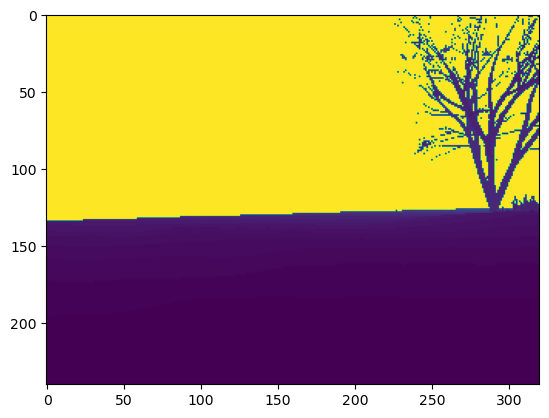

(240, 320)


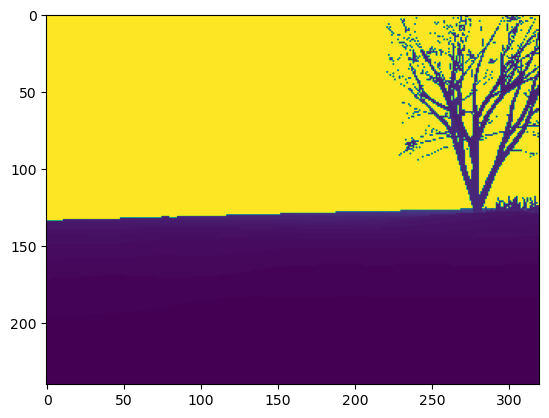

(240, 320)


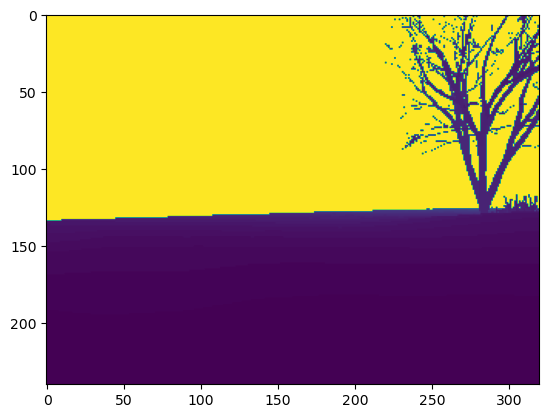

(240, 320)


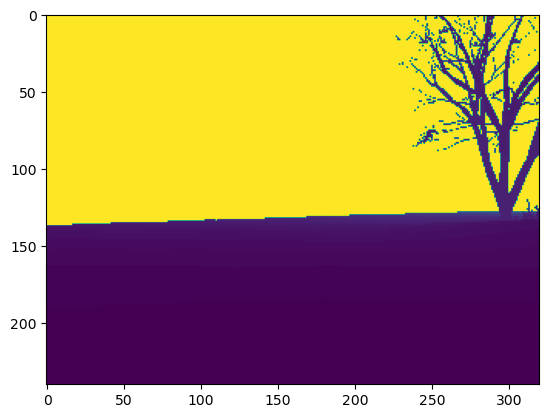

(240, 320)


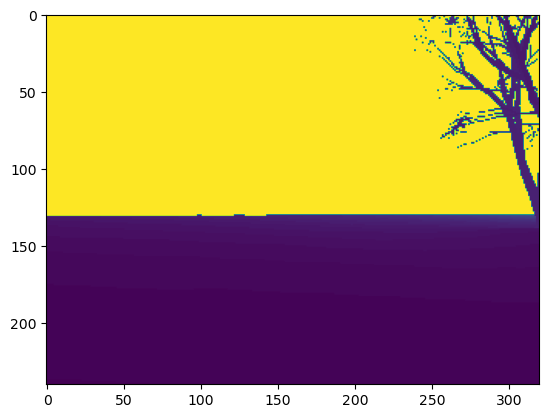

(240, 320)


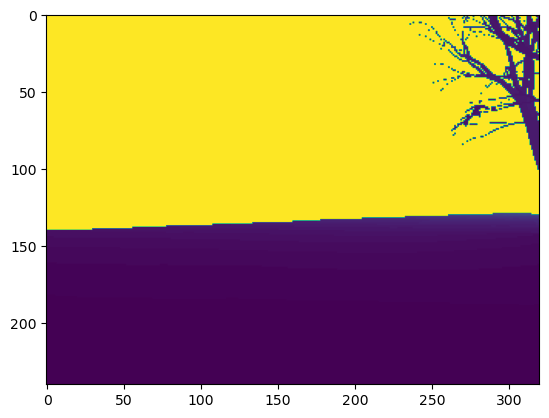

(240, 320)


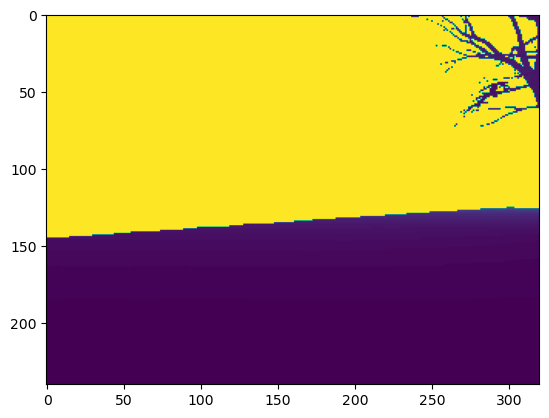

(240, 320)


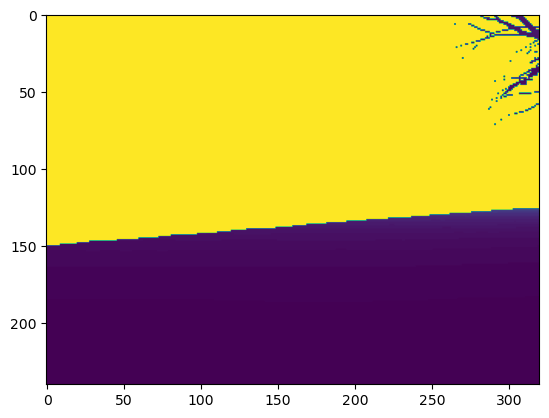

In [11]:
counter=0
for img in read_file['images']['depth_data']:
    if counter>10:
        break
    time.sleep(1)
    print(img.shape)
    plt.imshow(img)  
    plt.show()
    counter+=1
    